In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
from src.RBM import RBM, get_x, sample

In [13]:
import pandas as pd

In [15]:
df = pd.read_csv('./data/africa-soil/training.csv')
x = df.as_matrix(columns=df.columns[1:3595])
x[:, -1] = (x[:, -1] == 'Topsoil') * 1.0
x = x.astype(float)
y = df.as_matrix(columns=df.columns[3595:])
y = y.astype(float)

x = (x - np.repeat(x.mean(axis=0), x.shape[0]).reshape((x.shape[0], x.mean(axis=0).shape[0]), order='F')) / \
    np.sqrt(np.repeat(x.var(axis=0), x.shape[0]).reshape((x.shape[0], x.mean(axis=0).shape[0]), order='F'))

idx_train = list(np.random.choice(range(x.shape[0]), size=int(round(0.8 * x.shape[0]))))
idx_cv = list(set(range(x.shape[0])) - set(idx_train))

In [23]:
hidden_size = 40

params3 = {
    "size": (x.shape[1], hidden_size),
    "eta": 0.001,
    "batch_size": 20,
    "epochs": 95,
    "momentum": 0.9,
    "mode": 'gauss'
}

rbm3 = RBM(**params3)
rbm3.fit(x[idx_train, :], x[idx_cv, :])

94 / 95 | 0.224881333365

In [26]:
rbm3.w[0, :].shape

(40,)

In [31]:
range(40)[::2]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

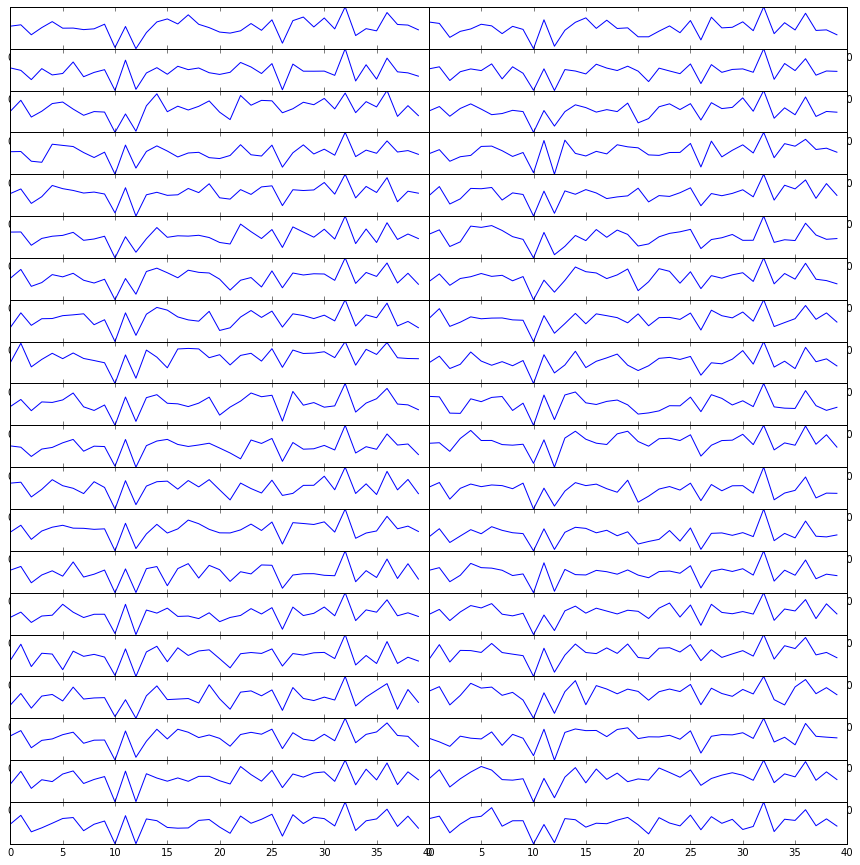

In [35]:
plt.figure(figsize=(15, 15))

gs = gridspec.GridSpec(20, 2, wspace=0.0, hspace=0.0)
for i in range(20):
    ax = plt.subplot(gs[i, 0]);ax.set_yticks([]);
    ax.plot(range(40), rbm3.w[2*i, :])
    
    ax = plt.subplot(gs[i, 1]);ax.set_yticks([]);
    ax.plot(range(40), rbm3.w[2*i + 1, :])